In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv(r'C:\\Users\\RUSHIKESH\\Downloads\\EastWestAirlines1.csv')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data1 = data.iloc[:,1:]

In [4]:
data["Award?"].value_counts()

0    2518
1    1481
Name: Award?, dtype: int64

In [5]:
def std_fun(i):
    return (i-i.min())/(i.max()-i.min())

In [6]:
df_norm = std_fun(data.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# H-Clustering :- 

In [7]:
# calculate the distance :-

dist = sch.linkage(df_norm, method='complete')

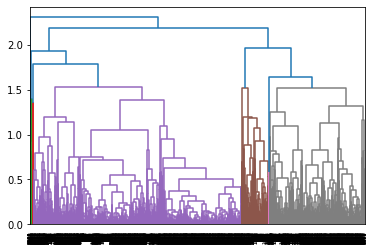

In [69]:
# create a dendrogram :-

dendrogram = sch.dendrogram(dist)

In [22]:
cluster = AgglomerativeClustering(linkage='complete', n_clusters=4, affinity='euclidean')
cluster

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [23]:
y_cluster = cluster.fit_predict(df_norm)
pd.DataFrame(y_cluster).value_counts()

0    2526
2    1144
1     325
3       4
dtype: int64

In [24]:
data1['h_cluster'] = pd.Series(y_cluster)
data1

<ipython-input-24-23659534dec6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['h_cluster'] = pd.Series(y_cluster)


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [25]:
result1 = data1.groupby(y_cluster).mean()
result1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster
0,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167,0
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000,1
2,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000,2
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,3


# ---------------------------------------------------------------------------------------------------------------

# K-Means Clustering :- 

In [27]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [28]:
kmeans_cluster = KMeans(n_clusters=4)
kmeans_cluster.fit(df_norm)

KMeans(n_clusters=4)

In [29]:
kmeans_cluster.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [30]:
data1 = data1.iloc[:,1:-3]

In [31]:
data1["Cluster_ID"] = pd.Series(kmeans_cluster.labels_)
data1.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Cluster_ID
0,0,1,1,1,174,1,0,0,1
1,0,1,1,1,215,2,0,0,1
2,0,1,1,1,4123,4,0,0,1
3,0,1,1,1,500,1,0,0,1
4,0,4,1,1,43300,26,2077,4,2


In [52]:
k = list(range(1,12,3))
k
TWSS = []
for i in k:
    kmeans=KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = []
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans_cluster.labels_==j],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    print("WSS value when k",i,sum(WSS))
    TWSS.append(sum(WSS))
    

WSS value when k 1 [506.3247853]
WSS value when k 4 [1170.17593612]
WSS value when k 7 [5046.24830562]
WSS value when k 10 [5467.96134923]


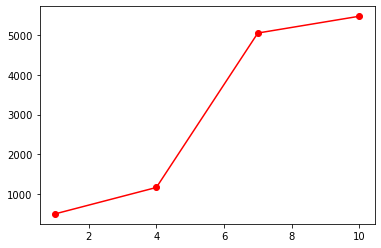

In [53]:
plt.plot(k,TWSS,"ro-")

In [47]:
# from above figure we are getting the k value for our cluster is 4 .
# By using K-Means clustering technique we get the 4 clusters and there mean are as below result2

In [35]:
result2 = data1.iloc[:,1:].groupby(data1.Cluster_ID).mean()
result2

,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Cluster_ID
Cluster_ID,,,,,,,,
0,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,0
1,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,1
2,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,2
3,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,3


# ---------------------------------------------------------------------------------------------------------------

# DBSCAN :-

In [36]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

In [37]:
dbscan = DBSCAN(eps=0.8 ,min_samples=20).fit(df_norm)
dbscan

DBSCAN(eps=0.8, min_samples=20)

In [38]:
pd.Series(dbscan.labels_).value_counts()

 0    2518
 1    1480
-1       1
dtype: int64

In [39]:
cl=pd.DataFrame(dbscan.labels_)

In [40]:
cl

,0
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [41]:
data2=data.iloc[:,0:-1]
data2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [42]:
data2["Cluster"]=cl
data2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [43]:
print("sillihoette score : %f" %metrics.silhouette_score(df_norm,dbscan.labels_))

sillihoette score : 0.535161


In [44]:
result3 = data2.iloc[:,1:-1].groupby(data2["Cluster"]).mean()
result3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
-1,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0
0,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
1,97010.442568,240.020946,2.662838,1.015541,1.018243,28876.327703,15.735135,837.258108,2.565541,4627.259459,1.0


In [45]:
# from using DBSCAN clustering we get the outliers which are represented by -1
# and we get the four clusters and there mean as per above result3

# ---------------------------------------------------------------------------------------------------------------